# Linear & Polynomial Regression (Analytic)

We will explore **linear regression** and **polynomial regression** using a synthetic dataset (`synthetic_regression.csv` with columns `x, y`). All solutions must use **analytic (closed-form)** formulas — **no gradient descent, no library `.fit()`** methods. Implement everything directly in **NumPy**.

## Tasks
1. **70/30 Train–Test Split (Unregularized)**
   - Split the data into 70% train / 30% test (random, reproducible).

   - Fit the following models:
     - Linear regression (polynomial degree 1),
     - Polynomial regression with degrees $k\in \{2, 5, 10, 15\}$.

   - For each model, build the design matrix explicitly:  For each datapoint, the row is given by

     $$\Phi(x) = [1, x, x^2, \dots, x^k].$$

     (let's call the design matrix $\Phi$ instead of $X$.)

   - Solve using the equations we derived in class:

     $$\mathbf{\theta}^* = (\Phi^\top\Phi)^{-1}\Phi^\top \mathbf{y}.$$

   - Compute **training error** and **test error**.

   - Plot (a) the dataset points with all model fits on one figure, and (b) a **bar chart** of training vs test errors.

2. **10-Fold Cross-Validation (Unregularized)**
   - Implement 10-fold CV yourself (shuffle indices once, split into folds).

   - For each degree {1, 2, 5, 10, 15}, compute the **average test error** across folds.

   - Plot a **bar chart** comparing the average test error across all models. Conclude the best hypothesis class.

3. **Repeat (1) and (2) with Ridge Regularization**.
   - Use ridge regression with: $$\mathbf{\theta}^*_\lambda = (\Phi^\top\Phi + \lambda I)^{-1}\Phi^\top \mathbf{y}.$$

   - **Take $\lambda = 1$** (fixed).

   - Show the same plots: fitted curves, bar chart of train/test errors, and bar chart of 10-fold average test errors.

### Notes
- If any bar chart scale makes some bars invisible, **use a logarithmic y-axis**: `plt.yscale("log")`.
- Keep your code structured and use the provided skeleton below.



## Functions to Implement

For this assignment, you will write the following functions yourself.  
Each function connects the mathematical definition we studied in class to working NumPy code. 

---

## 1. `design_matrix_poly_1d(x_column, degree, include_bias=True)`
- Build the design matrix **Φ** for **polynomial regression**:  
  \[
  $\Phi(x) = [1, x, x^2, \dots, x^k]$
  \]
- **Input:** vector of $x$-values, degree \(k\).  
- **Output:** design matrix of shape $(n \times (k+1)$.  

---

## 2. `normal_equation(Phi, y)`
- Compute the **closed-form OLS solution**:  
  \[
  $\theta^* = (\Phi^\top \Phi)^{-1} \Phi^\top \mathbf{y}$
  \]
  (or use the pseudoinverse if singular).  
- **Input:** design matrix $\Phi$, targets $\mathbf{y}$.  
- **Output:** regression coefficient vector $\mathbf{\theta}$.  

---

### 3. `ridge_closed_form(Phi, y, lam)`
- Compute the **ridge regression** solution:  
  \[
  $\theta^*_\lambda = (\Phi^\top \Phi + \lambda I)^{-1} \Phi^\top \mathbf{y}$
  \]
- **Input:** design matrix $\Phi$, targets $\mathbf{y}$, regularization parameter $\lambda$.  
- **Output:** coefficient vector $\mathbf{\theta}$.  

---

### 4. `predict(Phi, theta)`
- Generate predictions:  
  \[
  $\hat{\mathbf{y}} = \Phi \mathbf{\theta}$
  \]
- **Input:** design matrix $\Phi$, coefficients $\mathbf{\theta}$.  
- **Output:** predicted values.  

---

### 5. `err(y_true, y_pred)`
- Compute the **average squared error**:  
  \[
  $\text{Error} = \frac{1}{n} \sum_i (y_i - \hat{y}_i)^2$ 
  \]
- **Input:** true values $\mathbf{y}$, predicted values $\mathbf{\hat{y}}$.  
- **Output:** scalar error.  

---


## Functions to use:

You can use the following functions for reading the data, doing the test-train split and also for the k-fold CV.
### 6. `kfold_indices(n, K, seed=0)`
- Generate index splits for **K-fold cross-validation**.  
- **Input:** dataset size \(n\), number of folds \(K\), optional random seed.  
- **Output:** list of `train_idx` and `val_idx` pairs.  

---

### 7. `train_test_split_indices(n, test_ratio=0.3, seed=42)`
- Randomly split dataset into **training** and **test** sets.  
- **Input:** dataset size \(n\), test ratio, optional random seed.  
- **Output:** two arrays: `train_idx`, `test_idx`.  

---

### 8. `load_csv_xy(path)`
- Load a CSV file with columns **`x`** and **`y`**.  
- **Output:**  
  - \(X\): array of shape \(n \times 1\),  
  - \(y\): vector of shape \(n\).  

---
  




  


## Starter Skeleton (fill the TODOs)
Update the CSV path to where you saved `synthetic_regression.csv`.


In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt


def design_matrix_poly_1d(x_column: np.ndarray, degree: int, include_bias: bool=True) -> np.ndarray:
    """Return Vandermonde-style design matrix [1, x, x^2, ..., x^degree]."""
    Phi = np.ones((x_column.shape[0], 1)) if include_bias else np.empty((x_column.shape[0], 0))
    for i in range(1, degree + 1):
        Phi = np.column_stack((Phi, x_column ** i))
    return Phi


def normal_equation(Phi: np.ndarray, y: np.ndarray) -> np.ndarray:
    """Closed-form least squares: theta = (Phi^T Phi)^{-1} Phi^T y."""
    return np.linalg.pinv(Phi.T.dot(Phi)).dot(Phi.T).dot(y)


def ridge_closed_form(Phi: np.ndarray, y: np.ndarray, lam: float) -> np.ndarray:
    """Closed-form ridge: theta = (Phi^T Phi + λI)^{-1} Phi^T y."""
    return np.linalg.pinv(Phi.T.dot(Phi) + lam * np.eye(Phi.shape[1])).dot(Phi.T).dot(y)


def predict(Phi: np.ndarray, theta: np.ndarray) -> np.ndarray:
    return Phi.dot(theta)

def err(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return np.mean((y_true - y_pred) ** 2).item()

def kfold_indices(n: int, K: int, seed: int = 0):
    rng = np.random.default_rng(seed)
    idx = np.arange(n)
    rng.shuffle(idx)
    folds = np.array_split(idx, K)
    splits = []
    for k in range(K):
        val_idx = folds[k]
        train_idx = np.concatenate([folds[i] for i in range(K) if i != k])
        splits.append((train_idx, val_idx))
    return splits

def train_test_split_indices(n: int, test_ratio: float = 0.3, seed: int = 42):
    rng = np.random.default_rng(seed)
    idx = np.arange(n)
    rng.shuffle(idx)
    n_test = int(round(test_ratio * n))
    test_idx = idx[:n_test]
    train_idx = idx[n_test:]
    return train_idx, test_idx

def load_csv_xy(path: str):
    xs, ys = [], []
    with open(path, "r") as f:
        rd = csv.DictReader(f)
        for row in rd:
            xs.append(float(row["x"]))
            ys.append(float(row["y"]))
    X = np.array(xs).reshape(-1, 1)
    y = np.array(ys)
    return X, y


In [3]:
# Load data
X, y = load_csv_xy("synthetic_regression.csv")

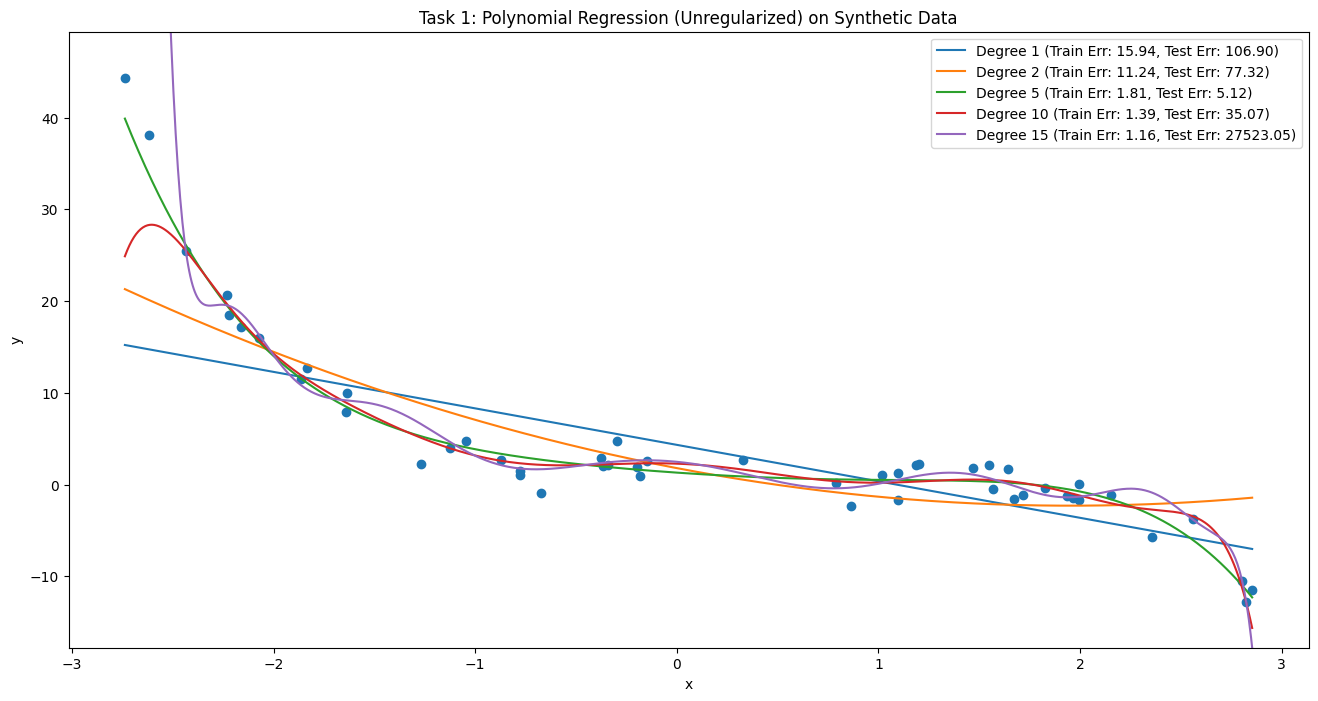

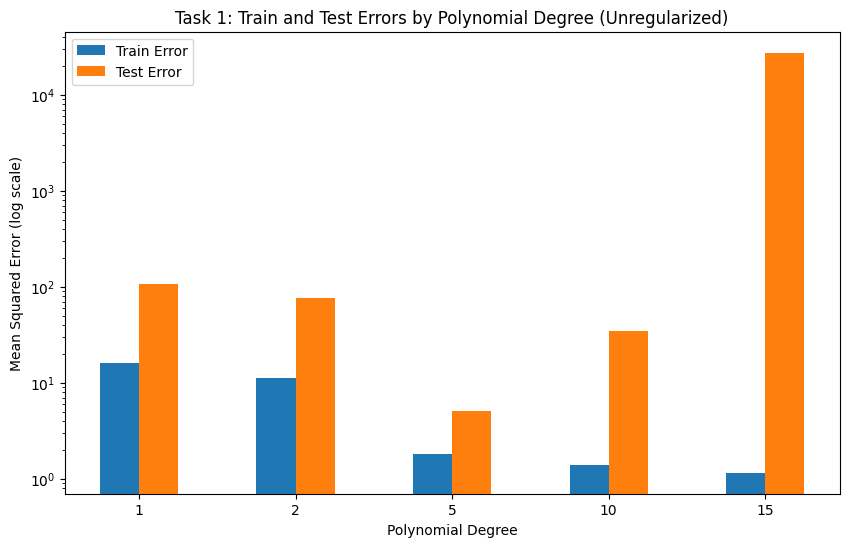

In [4]:
# Task 1: 70/30 Train-Test Split (Unregularized)

# Split into train and test sets
train_idx, test_idx = train_test_split_indices(X.shape[0])
X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test = X[test_idx], y[test_idx]

# Plot the data
fig1, ax1 = plt.subplots(figsize=(16, 8))
ax1.scatter(X, y)

degrees = [1, 2, 5, 10, 15]
train_errs = []
test_errs = []

for degree in degrees:
    # Create design matrices
    Phi_train = design_matrix_poly_1d(X_train, degree=degree)
    Phi_test = design_matrix_poly_1d(X_test, degree=degree)

    # Fit model
    theta = normal_equation(Phi_train, y_train)

    # Predict and compute errors
    y_train_pred = predict(Phi_train, theta)
    y_train_err = err(y_train, y_train_pred)

    y_test_pred = predict(Phi_test, theta)
    y_test_err = err(y_test, y_test_pred)

    train_errs.append(y_train_err)
    test_errs.append(y_test_err)
    
    # Plot the model
    x_line = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
    Phi_line = design_matrix_poly_1d(x_line, degree=degree)
    y_line = predict(Phi_line, theta)
    
    ax1.plot(
        x_line,
        y_line,
        label=f"Degree {degree} (Train Err: {y_train_err:.2f}, Test Err: {y_test_err:.2f})",
    )

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_ylim((y.min()-5, y.max()+5))
ax1.set_title("Task 1: Polynomial Regression (Unregularized) on Synthetic Data")
ax1.legend()

# Plot the bar chart of errors
width = 0.25  # the width of the bars
x = np.arange(len(degrees))  # the label locations
train_err_x = x - width/2
test_err_x = x + width/2

fig2, ax2 = plt.subplots(figsize=(10, 6))
ax2.bar(train_err_x, train_errs, width, label='Train Error')
ax2.bar(test_err_x, test_errs, width, label='Test Error')

ax2.set_xlabel('Polynomial Degree')
ax2.set_yscale('log')
ax2.set_ylabel('Mean Squared Error (log scale)')
ax2.set_title('Task 1: Train and Test Errors by Polynomial Degree (Unregularized)')
ax2.set_xticks(x)
ax2.set_xticklabels(map(str, degrees))
ax2.legend()

plt.show()


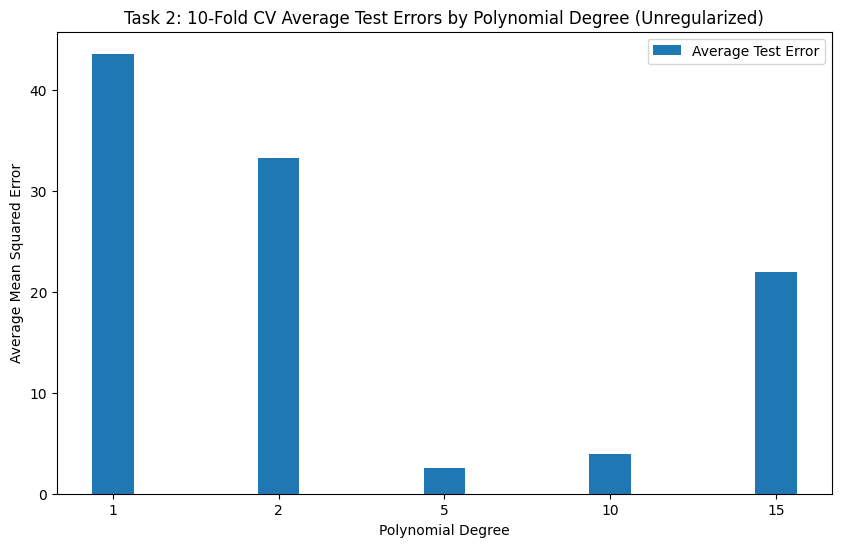

In [5]:
# Task 2: 10-Fold Cross-Validation (Unregularized)

# 10-Fold Cross-Validation
kf = kfold_indices(n = X.shape[0], K=10)

degrees = [1, 2, 5, 10, 15]
avg_test_errs = []

# Train and evaluate models for each degree
for degree in degrees:
    test_errs = []
    for train_idx, val_idx in kf:
        # Split data
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[val_idx], y[val_idx]
        
        # Create design matrices
        Phi_train = design_matrix_poly_1d(X_train, degree=degree)
        Phi_test = design_matrix_poly_1d(X_test, degree=degree)

        # Fit model
        theta = normal_equation(Phi_train, y_train)
        
        # Predict and compute errors
        y_test_pred = predict(Phi_test, theta)
        y_test_err = err(y_test, y_test_pred)

        test_errs.append(y_test_err)
        
    avg_test_errs.append(np.mean(test_errs))

# Plot the bar chart of average test errors
width = 0.25  # the width of the bars        
x = np.arange(len(degrees))  # the label locations

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, avg_test_errs, width, label='Average Test Error')

ax.set_xlabel('Polynomial Degree')
ax.set_ylabel('Average Mean Squared Error')
ax.set_title('Task 2: 10-Fold CV Average Test Errors by Polynomial Degree (Unregularized)')
ax.set_xticks(x)
ax.set_xticklabels(map(str, degrees))
ax.legend()

plt.show()

From the results, the best hypothesis class for polynomial regression (by 10-fold CV MSE) is degree 5.

$$
H_5=\left\{\,h \mid h(x)=\theta_0+\theta_1 x+\theta_2 x^2+\theta_3 x^3+\theta_4 x^4+\theta_5 x^5,\ \theta_i\in\mathbb{R}\right\}.
$$


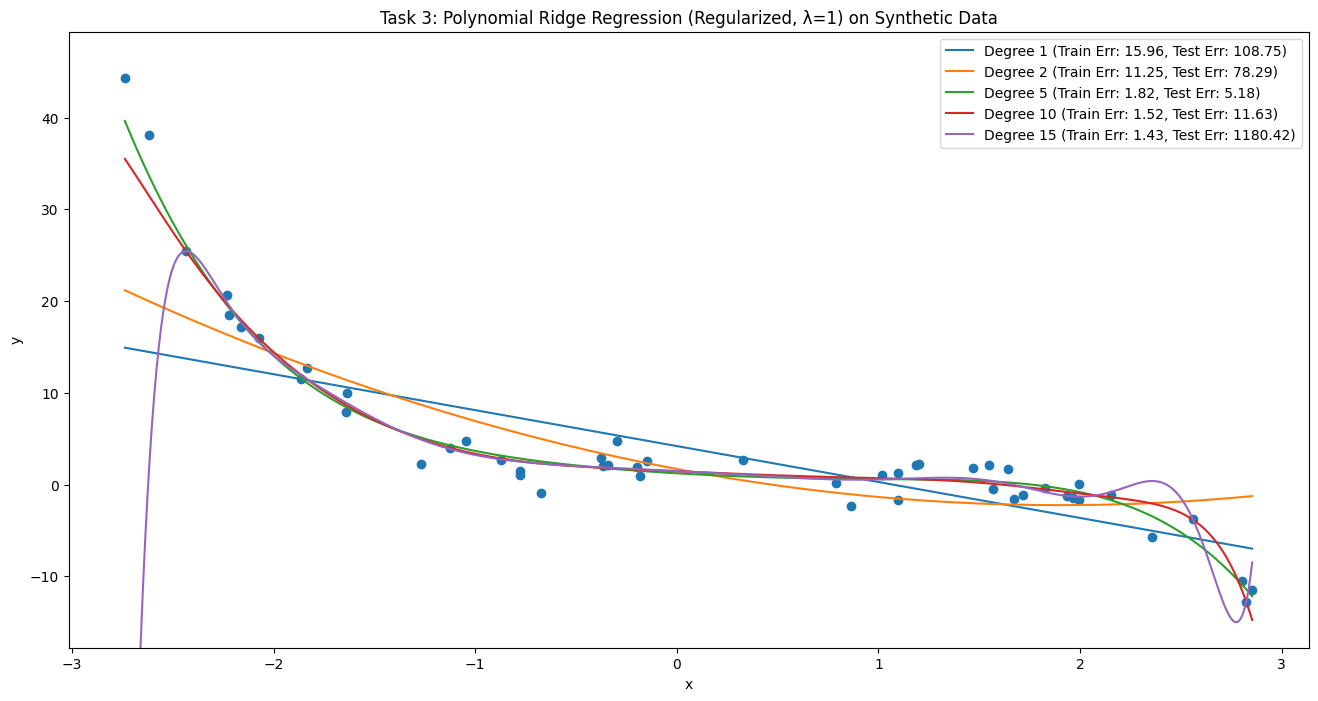

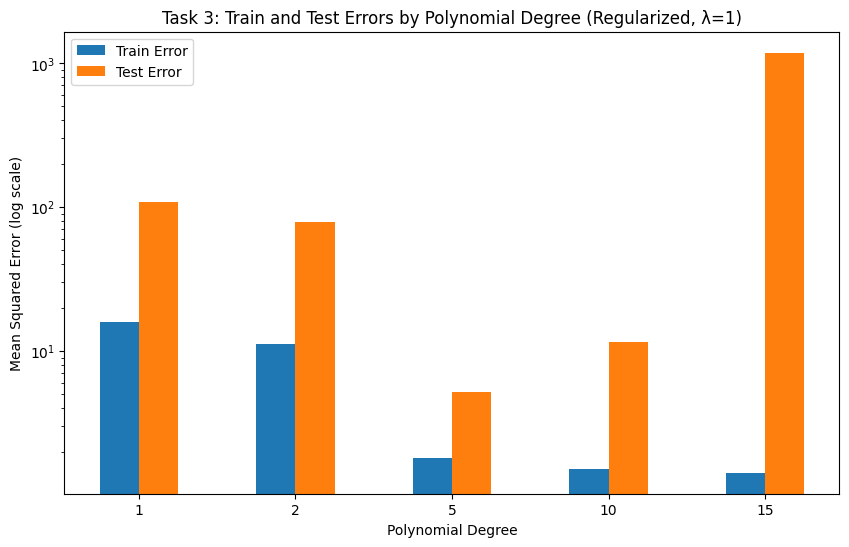

In [6]:
# Task 3.1: 70/30 Train-Test Split (Regularized) 

# Split into train and test sets
train_idx, test_idx = train_test_split_indices(X.shape[0])
X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test = X[test_idx], y[test_idx]

# Plot the data and models fits
fig1, ax1 = plt.subplots(figsize=(16, 8))
ax1.scatter(X, y)

degrees = [1, 2, 5, 10, 15]
train_errs = []
test_errs = []

for degree in degrees:
    # Create design matrices
    Phi_train = design_matrix_poly_1d(X_train, degree=degree)
    Phi_test = design_matrix_poly_1d(X_test, degree=degree)

    # Fit model
    theta = ridge_closed_form(Phi_train, y_train, lam=1.0)

    # Predict and compute errors
    y_train_pred = predict(Phi_train, theta)
    y_train_err = err(y_train, y_train_pred)

    y_test_pred = predict(Phi_test, theta)
    y_test_err = err(y_test, y_test_pred)

    train_errs.append(y_train_err)
    test_errs.append(y_test_err)
    
    # Plot the model
    x_line = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
    Phi_line = design_matrix_poly_1d(x_line, degree=degree)
    y_line = predict(Phi_line, theta)
    
    ax1.plot(
        x_line,
        y_line,
        label=f"Degree {degree} (Train Err: {y_train_err:.2f}, Test Err: {y_test_err:.2f})",
    )


ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_ylim((y.min()-5, y.max()+5))
ax1.set_title("Task 3: Polynomial Ridge Regression (Regularized, λ=1) on Synthetic Data")
ax1.legend()

# Plot the bar chart of errors
width = 0.25  # the width of the bars
x = np.arange(len(degrees))  # the label locations
train_err_x = x - width/2
test_err_x = x + width/2

fig2, ax2 = plt.subplots(figsize=(10, 6))
ax2.bar(train_err_x, train_errs, width, label='Train Error')
ax2.bar(test_err_x, test_errs, width, label='Test Error')

ax2.set_yscale('log')
ax2.set_xlabel('Polynomial Degree')
ax2.set_ylabel('Mean Squared Error (log scale)')
ax2.set_title('Task 3: Train and Test Errors by Polynomial Degree (Regularized, λ=1)')
ax2.set_xticks(x)
ax2.set_xticklabels(map(str, degrees))
ax2.legend()

plt.show()

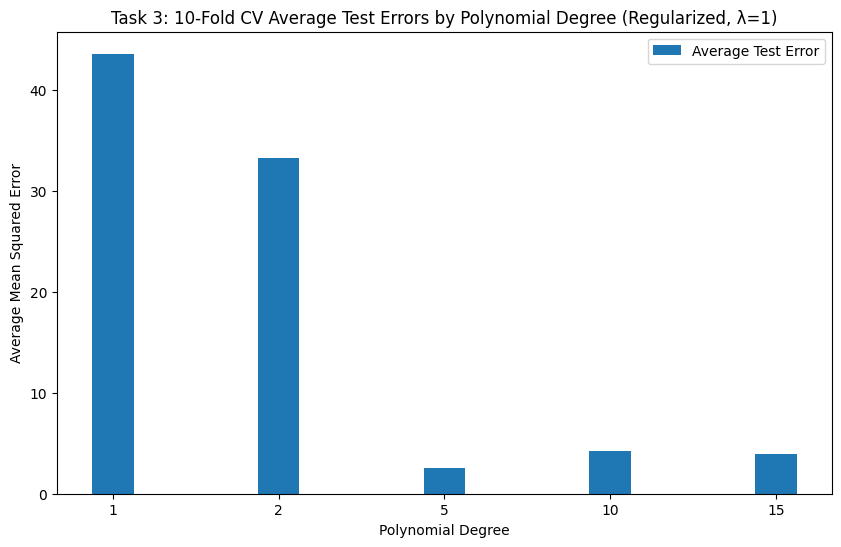

In [7]:
# Task 3.2: 10-Fold Cross-Validation (Regularized)

# 10-Fold Cross-Validation
kf = kfold_indices(n = X.shape[0], K=10)

degrees = [1, 2, 5, 10, 15]
avg_test_errs = []

# Train and evaluate models for each degree
for degree in degrees:
    test_errs = []
    for train_idx, val_idx in kf:
        # Split data
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[val_idx], y[val_idx]
        
        # Create design matrices
        Phi_train = design_matrix_poly_1d(X_train, degree=degree)
        Phi_test = design_matrix_poly_1d(X_test, degree=degree)

        # Fit model
        theta = ridge_closed_form(Phi_train, y_train, lam=1)
        
        # Predict and compute errors
        y_test_pred = predict(Phi_test, theta)
        y_test_err = err(y_test, y_test_pred)

        test_errs.append(y_test_err)
        
    avg_test_errs.append(np.mean(test_errs))

width = 0.25  # the width of the bars        
x = np.arange(len(degrees))  # the label locations

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, avg_test_errs, width, label='Average Test Error')

ax.set_xlabel('Polynomial Degree')
ax.set_ylabel('Average Mean Squared Error')
ax.set_title('Task 3: 10-Fold CV Average Test Errors by Polynomial Degree (Regularized, λ=1)')
ax.set_xticks(x)
ax.set_xticklabels(map(str, degrees))
ax.legend()

plt.show()